In [ ]:
# default_exp models.baseline


In [ ]:
# all_func


# Baseline Models

In [ ]:
from peptide.preprocessing.data import *
from peptide.preprocessing.embedding import *

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer

# import xgboost as xgb
from xgboost import XGBClassifier

import pandas as pd
import matplotlib.pyplot as plt


### Load data

In [ ]:
merged_train_df, merged_test_df = get_all_data(merge=True)
(
    acp_train_df,
    acp_test_df,
    amp_train_df,
    amp_test_df,
    dna_bind_train_df,
    dna_bind_test_df,
) = get_all_data()


In [ ]:
amp_train_df.head(5)


,sequence,label_amp,length
3,"[F, F, G, R, L, K, A, V, F, R, G, A, R, Q, G, ...",1,21
4,"[D, F, G, C, A, R, G, M, I, F, V, C, M, R, R, ...",1,48
5,"[G, R, R, K, R, K, W, L, R, R, I, G, K, G, V, ...",1,26
6,"[L, L, M, R, K, L, I, K, G, Y, G, Y, L, F, G, ...",1,22
7,"[L, I, D, H, L, G, A, P, R, W, A, V, D, T, I, ...",1,61


In [ ]:
amp_test_df.head(5)


,sequence,label_amp,length
2629,"[S, V, V, H, Q, D, V, G, G, K, D, Y, T, T, K, ...",0,18
1102,"[F, K, F, G, S, F, I, K, R, M, W, R, S, K, L, ...",1,49
946,"[G, W, F, K, K, T, F, H, K, V, S, H, A, V, K, ...",1,30
118,"[G, I, F, S, S, R, K, C, K, T, V, S, K, T, F, ...",1,25
326,"[F, M, G, G, L, I, K, A, A, T, K, I, V, P, A, ...",1,24


In [ ]:
amp_train_df, amp_train_features, amp_train_labels = extract_features_labels(
    amp_train_df, max_seq_len=150
)
amp_test_df, amp_test_features, amp_test_labels = extract_features_labels(
    amp_test_df, max_seq_len=150
)


In [ ]:
amp_train_df["length"].max(), amp_test_df["length"].max()


(183, 171)

In [ ]:
len(amp_train_features.columns), len(amp_test_features.columns)


(150, 150)

## One Hot Encoding - 2 Options

### Option 1 - Learn from train data
`OneHotEncoder` with `handle_unknown='ignore'`

In [ ]:
amp_train_features


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,F,F,G,R,L,K,A,V,F,R,...,None,None,None,None,None,None,None,None,None,None
1,D,F,G,C,A,R,G,M,I,F,...,None,None,None,None,None,None,None,None,None,None
2,G,R,R,K,R,K,W,L,R,R,...,None,None,None,None,None,None,None,None,None,None
3,L,L,M,R,K,L,I,K,G,Y,...,None,None,None,None,None,None,None,None,None,None
4,L,I,D,H,L,G,A,P,R,W,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3229,N,E,D,L,R,T,F,Q,L,S,...,None,None,None,None,None,None,None,None,None,None
3230,V,F,D,A,Y,R,P,I,A,V,...,None,None,None,None,None,None,None,None,None,None
3231,S,S,G,N,V,N,E,V,P,K,...,None,None,None,None,None,None,None,None,None,None
3232,P,H,T,H,T,Q,K,E,V,I,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
amp_test_features


,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,S,V,V,H,Q,D,V,G,G,K,...,None,None,None,None,None,None,None,None,None,None
1,F,K,F,G,S,F,I,K,R,M,...,None,None,None,None,None,None,None,None,None,None
2,G,W,F,K,K,T,F,H,K,V,...,None,None,None,None,None,None,None,None,None,None
3,G,I,F,S,S,R,K,C,K,T,...,None,None,None,None,None,None,None,None,None,None
4,F,M,G,G,L,I,K,A,A,T,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803,F,A,S,G,K,G,N,R,V,I,...,None,None,None,None,None,None,None,None,None,None
804,L,K,L,K,S,I,V,S,W,A,...,None,None,None,None,None,None,None,None,None,None
805,A,Q,E,P,V,K,G,P,V,S,...,None,None,None,None,None,None,None,None,None,None
806,A,A,A,G,T,E,G,A,V,S,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
ohe1 = OneHotEncoder(handle_unknown="ignore")

x_train = ohe1.fit_transform(amp_train_features)
y_train = amp_train_labels["label_amp"].to_numpy()


In [ ]:
x_test = ohe1.transform(amp_test_features)
y_test = amp_test_labels["label_amp"].to_numpy()


In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((3234, 2772), (3234,), (808, 2772), (808,))

**Logistic Regression**

In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)


LogisticRegression(max_iter=10000)

**SVM**

In [ ]:
svc = LinearSVC(max_iter=10000)
svc.fit(x_train, y_train)


LinearSVC(max_iter=10000)

**XGBoost**

Examples - https://www.kaggle.com/code/stuarthallows/using-xgboost-with-scikit-learn/notebook

In [ ]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
lr_preds = lr.predict(x_test)
svc_preds = svc.predict(x_test)
xgb_preds = xgb.predict(x_test)


In [ ]:
from sklearn.metrics import *

scores = []
for preds in [lr_preds, svc_preds, xgb_preds]:
    scores.append(
        [
            accuracy_score(y_test, preds),
            recall_score(y_test, preds),
            precision_score(y_test, preds),
            f1_score(y_test, preds),
        ]
    )


In [ ]:
pd.DataFrame(
    scores, columns=["acc", "recall", "precision", "f1"], index=["lr", "svc", "xgb"]
)


,acc,recall,precision,f1
lr,0.860149,0.846348,0.865979,0.856051
svc,0.820545,0.813602,0.819797,0.816688
xgb,0.875000,0.846348,0.893617,0.869340


### Option 2 - Explicitly define Amino Acids
`OneHotEncoder` with explicitly listed categories (the unique amino acids) plus a `PAD` token for filling in `None` values.

In [ ]:
import string

amino_acids = list(string.ascii_uppercase)


In [ ]:
amino_acids.append("PAD")


In [ ]:
amino_acids


['A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 'PAD']

In [ ]:
acp_train_features.fillna("PAD")


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,R,R,W,W,R,R,W,R,R,W,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
1,G,W,K,S,V,F,R,K,A,K,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
2,A,L,W,K,T,M,L,K,K,L,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
3,G,L,F,D,V,I,K,K,V,A,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
4,V,A,K,L,L,A,K,L,A,K,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373,L,L,K,L,L,K,W,L,L,K,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
1374,G,F,K,D,W,I,K,G,A,A,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD
1375,E,S,E,F,D,R,Q,E,Y,E,...,D,W,S,K,Y,D,N,Q,E,PAD
1376,F,I,S,A,I,A,S,F,L,G,...,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD,PAD


In [ ]:
ohe2 = OneHotEncoder(categories=[amino_acids] * acp_train_features.shape[1])


In [ ]:
X_train = ohe2.fit_transform(acp_train_features.fillna("PAD"))
y_train = acp_train_labels["label_acp"].to_numpy()


In [ ]:
X_test = ohe2.transform(acp_test_features.fillna("PAD"))
y_test = acp_test_labels["label_acp"].to_numpy()


In [ ]:
lr = LogisticRegression(max_iter=10000)
lr.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [ ]:
svc = LinearSVC(max_iter=10000)
svc.fit(X_train, y_train)


LinearSVC(max_iter=10000)

In [ ]:
xgb = XGBClassifier(use_label_encoder=False)
xgb.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [ ]:
lr_preds = lr.predict(X_test)
svc_preds = svc.predict(X_test)
xgb_preds = xgb.predict(X_test)


In [ ]:
from sklearn.metrics import *

scores = []
for preds in [lr_preds, svc_preds, xgb_preds]:
    scores.append(
        [
            accuracy_score(y_test, preds),
            recall_score(y_test, preds),
            precision_score(y_test, preds),
            f1_score(y_test, preds),
        ]
    )


In [ ]:
pd.DataFrame(
    scores, columns=["acc", "recall", "precision", "f1"], index=["lr", "svc", "xgb"]
)


,acc,recall,precision,f1
lr,0.744186,0.790698,0.723404,0.755556
svc,0.697674,0.720930,0.688889,0.704545
xgb,0.755814,0.819767,0.726804,0.770492


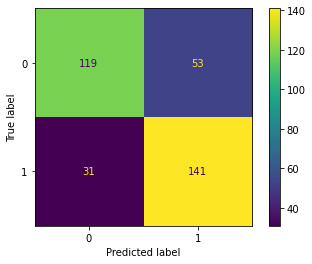

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_test, xgb_preds)
plt.show()


## Pipeline

In [ ]:
MODELS = ["lr", "svm", "xgb"]


In [ ]:
def create_pipeline(model: str, num_features: int) -> Pipeline:
    """Create and return pipeline"""

    preprocessor = ColumnTransformer(
        [
            (
                "ohe",
                OneHotEncoder(handle_unknown="ignore"),
                slice(num_features - 1),
            )  # slice indicating all cols
        ]
    )

    if model == "lr":
        clf = LogisticRegression(max_iter=1000)
    elif model == "svm":
        clf = LinearSVC(max_iter=1000)
    elif model == "xgb":
        clf = XGBClassifier()
    else:
        raise Exception("model needs to be one of lr, svm or xgb")

    pipe = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", clf)])
    return pipe


In [ ]:
def train(model, X_train, y_train):
    model_pipeline = create_pipeline(model, len(X_train.columns))
    model_pipeline.fit(X_train, y_train)
    return model_pipeline


def predict(model_pipeline, X_test):
    preds = model_pipeline.predict(X_test)
    return preds


In [ ]:
def train_predict_allmodels(X_train, y_train, X_test, models):
    all_preds = {}
    for model in models:
        model_pipeline = train(model, X_train, y_train)
        preds = predict(model_pipeline, X_test)
        all_preds[model] = preds

    return all_preds


def get_all_scores(all_preds, y_test, models):
    scores = []
    for model in models:
        preds = all_preds[model]
        scores.append(
            [
                accuracy_score(y_test, preds),
                recall_score(y_test, preds),
                precision_score(y_test, preds),
                f1_score(y_test, preds),
            ]
        )

    return pd.DataFrame(
        scores, columns=["acc", "recall", "precision", "f1"], index=["lr", "svc", "xgb"]
    )


In [ ]:
# acp_train_df, acp_test_df, amp_train_df, amp_test_df, dna_bind_train_df, dna_bind_test_df

_, acp_train_features, acp_train_labels = extract_features_labels(acp_train_df)
_, acp_test_features, acp_test_labels = extract_features_labels(acp_test_df)

_, amp_train_features, amp_train_labels = extract_features_labels(
    amp_train_df, max_seq_len=150
)
_, amp_test_features, amp_test_labels = extract_features_labels(
    amp_test_df, max_seq_len=150
)

_, dna_bind_train_features, dna_bind_train_labels = extract_features_labels(
    dna_bind_train_df, max_seq_len=1000
)
_, dna_bind_test_features, dna_bind_test_labels = extract_features_labels(
    dna_bind_test_df, max_seq_len=1000
)


### ACP

In [ ]:
X_train, y_train = acp_train_features, acp_train_labels["label_acp"].to_numpy()
X_test, y_test = acp_test_features, acp_test_labels["label_acp"].to_numpy()

all_preds = train_predict_allmodels(X_train, y_train, X_test, models=MODELS)
get_all_scores(all_preds, y_test, models=MODELS)


/Users/Vinod/opt/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,acc,recall,precision,f1
lr,0.747093,0.790698,0.727273,0.757660
svc,0.697674,0.720930,0.688889,0.704545
xgb,0.755814,0.819767,0.726804,0.770492


### AMP

In [ ]:
X_train, y_train = amp_train_features, amp_train_labels["label_amp"].to_numpy()
X_test, y_test = amp_test_features, amp_test_labels["label_amp"].to_numpy()

all_preds = train_predict_allmodels(X_train, y_train, X_test, models=MODELS)
get_all_scores(all_preds, y_test, models=MODELS)


/Users/Vinod/opt/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,acc,recall,precision,f1
lr,0.861386,0.848866,0.866324,0.857506
svc,0.820545,0.813602,0.819797,0.816688
xgb,0.875000,0.846348,0.893617,0.869340


### DNA Binding

In [ ]:
X_train, y_train = (
    dna_bind_train_features,
    dna_bind_train_labels["label_dna_bind"].to_numpy(),
)
X_test, y_test = (
    dna_bind_test_features,
    dna_bind_test_labels["label_dna_bind"].to_numpy(),
)

all_preds = train_predict_allmodels(X_train, y_train, X_test, models=MODELS)
get_all_scores(all_preds, y_test, models=MODELS)


/Users/Vinod/opt/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/Vinod/opt/anaconda3/envs/peptide/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


,acc,recall,precision,f1
lr,0.757042,0.938422,0.692258,0.796760
svc,0.749560,0.934952,0.685751,0.791193
xgb,0.722711,0.873374,0.675386,0.761725


## GridSearch

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?highlight=gridsearch#sklearn.model_selection.GridSearchCV
- https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation

## Automl (TPOT)

https://www.capitalone.com/tech/machine-learning/tuning-xgboost-hyperparameters/

In [ ]:
(
    dna_bind_train_df,
    dnabind_train_features,
    dnabind_train_labels,
) = extract_features_labels(dna_bind_train_df, max_seq_len=1000)
dna_bind_test_df, dnabind_test_features, dnabind_test_labels = extract_features_labels(
    dna_bind_test_df, max_seq_len=1000
)


In [ ]:
dna_bind_train_df["length"].max(), dna_bind_test_df["length"].max()


(4911, 5183)

In [ ]:
len(dnabind_train_features.columns), len(dnabind_test_features.columns)


(1000, 1000)

In [ ]:
dnabind_train_features


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,M,S,G,H,S,K,W,A,T,T,...,None,None,None,None,None,None,None,None,None,None
1,M,I,G,W,L,Q,G,Q,K,V,...,None,None,None,None,None,None,None,None,None,None
2,M,A,R,I,L,R,N,V,Y,S,...,None,None,None,None,None,None,None,None,None,None
3,M,K,C,P,R,C,G,K,Q,E,...,None,None,None,None,None,None,None,None,None,None
4,M,T,K,A,D,I,I,E,G,V,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14184,M,E,E,K,K,E,K,E,I,L,...,None,None,None,None,None,None,None,None,None,None
14185,M,S,T,I,A,D,P,R,D,I,...,None,None,None,None,None,None,None,None,None,None
14186,M,S,L,E,S,F,D,K,D,I,...,None,None,None,None,None,None,None,None,None,None
14187,M,A,L,K,S,Y,K,P,T,T,...,None,None,None,None,None,None,None,None,None,None


In [ ]:
dnabind_test_features


,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,A,K,K,R,S,R,S,R,K,R,...,None,None,None,None,None,None,None,None,None,None
1,M,V,M,V,V,N,P,L,T,A,...,None,None,None,None,None,None,None,None,None,None
2,M,K,D,D,I,N,Q,E,I,T,...,None,None,None,None,None,None,None,None,None,None
3,M,N,N,A,A,N,T,G,T,T,...,None,None,None,None,None,None,None,None,None,None
4,M,A,K,P,A,K,R,I,K,S,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2267,M,N,F,S,R,E,R,T,I,T,...,None,None,None,None,None,None,None,None,None,None
2268,M,V,V,V,D,K,E,I,K,K,...,None,None,None,None,None,None,None,None,None,None
2269,M,N,P,S,T,H,V,S,S,N,...,None,None,None,None,None,None,None,None,None,None
2270,M,V,R,S,G,K,K,A,V,V,...,None,None,None,None,None,None,None,None,None,None


## One Hot Encoding - 2 Options